# Landsat  Data



# Landsat Tif Files in Python

When you used NAIP data, all (4) bands were stored in a single `.tif` file. However, sometimes data are downloaded in individual bands rather
than a single file. When using Landsat data, each band in a landsat scene is often stored in an individual `.tif` file.

## About Landsat Data

> At over 40 years, the Landsat series of satellites provides the longest temporal record of moderate resolution multispectral data of the Earth’s surface on a global basis. The Landsat record has remained remarkably unbroken, proving a unique resource to assist a broad range of specialists in managing the world’s food, water, forests, and other natural resources for a growing world population.  It is a record unmatched in quality, detail, coverage, and value. Source: <a href="https://landsat.usgs.gov/about-landsat" target="_blank">USGS</a>


<figure>
    <a href="https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/TimelineOnlyForWebRGB.png">
    <img src="https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/TimelineOnlyForWebRGB.png" alt="Landsat 40 year timeline source: USGS.">
    </a>
    <figcaption>The 40 year history of landsat missions. Source: USGS - <a href="https://landsat.usgs.gov/landsat-missions-timeline" target = "_blank">USGS Landsat Timeline</a>
    </figcaption>
</figure>

Landsat data are spectral and collected using a platform mounted on a satellite in space that orbits the earth. The spectral bands
and associated spatial resolution of the first 9 bands in the Landsat 8 sensor
are listed below.

#### Landsat 8 Bands

| Band | Wavelength range (nanometers) | Spatial Resolution (m) | Spectral Width (nm)|
|-------------------------------------|------------------|--------------------|----------------|
| Band 1 - Coastal aerosol | 430 - 450 | 30 | 2.0 |
| Band 2 - Blue | 450 - 510 | 30 | 6.0 |
| Band 3 - Green | 530 - 590 | 30 | 6.0 |
| Band 4 - Red | 640 - 670 | 30 | 0.03 |
| Band 5 - Near Infrared (NIR) | 850 - 880 | 30 | 3.0 |
| Band 6 - SWIR 1 | 1570 - 1650 | 30 | 8.0  |
| Band 7 - SWIR 2 | 2110 - 2290 | 30 | 18 |
| Band 8 - Panchromatic | 500 - 680 | 15 | 18 |
| Band 9 - Cirrus | 1360 - 1380 | 30 | 2.0 |

### Understand Landsat Data
When working with landsat, it is important to understand both the metadata and
the file naming convention. The metadata tell you how the data were processed,
where the data are from and how they are structured.

The file names, tell you what sensor collected the data, the date the data were collected, and more.

<a href="https://landsat.usgs.gov/what-are-naming-conventions-landsat-scene-identifiers" target="_blank">More about the Landsat file naming convention.</a>

<figure>
    <a href="https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/Collection_FileNameDiffs.png">
    <img src="https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/Collection_FileNameDiffs.png" alt="landsat file naming convention">
    </a>
    <figcaption>Landsat file names Source: USGS Landsat - <a href="https://landsat.usgs.gov/what-are-naming-conventions-landsat-scene-identifiers" target = "_blank">Landsat Scene Naming Conventions</a>
    </figcaption>
</figure>

### Landsat File Naming Convention

Landsat and many other satellite remote sensing data is named in a way that tells you a about:

* When the data were collected and processed
* What sensor was used to collect the data
* What satellite was used to collect the data.

And more. 

Here you will learn a few key components of the landsat 8 collection file name. The first scene that you work with below is named:

`LC080340322016072301T1-SC20180214145802`

First, we have LC08

* **L:** Landsat Sensor
* **C:** OLI / TIRS combined platform
* **08:** Landsat 8 (not 7)

* **034032:** The next 6 digits represent the path and row of the scene. This identifies the spatial coverage of the scene

Finally, you have a date. In your case as follows:

* **20160723:** representing the year, month and day that the data were collected.

The second part of the file name above tells you more about when the data were last processed. You can read more about this naming convention using the link below.

<a href="https://landsat.usgs.gov/what-are-naming-conventions-landsat-scene-identifiers" target="_blank">Learn more about Landsat 8 file naming conventions.</a>

As you work wtih these data, it is good to double check that you are working with the sensor (Landsat 8) and the time period that you intend. Having this information in the file name makes it easier to keep track of this as you process your data. 

## Open Landsat .tif Files in Python

Now that you understand the Landsat 8 Collection file naming conventions, you will bring the data into Python. To begin, load additional libraries needed for this section. Most libraries we need, such as `numpy`, the `plot` module from `earthpy`, and `matplotlib` have already been loaded.

In [2]:
import os
# This library is needed for file manipulation.
from glob import glob

import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Set working directory & get data
et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      "data"))

You will be working in the `landsat-collect` directory. Notice that the data in that directory are stored by individual band. Each file is a single geotiff (.tif) rather than one tif with all the bands which is what you worked with in the previous lesson with NAIP data.  

### Why Are Landsat Bands Stored As Individual Files?
 
Conventionally landsat was stored in a file format called HDF - hierarchical
data format. However that format, while extremely efficient, is a bit more
challenging to work with. In recent years USGS has started to make each band
of a landsat scene available as a `.tif` file. This makes it a bit easier to use
across many different programs and platforms.

The good news is that you already know how to work with .tif files in `Python`. You just need to learn how to batch process a series of `.tif` files to work with Landsat 8 Collections. 

## Generate a List of Files in Python
 
To begin, explore the Landsat files in your `cold-springs-fire` directory. Start with 
looking at lists of the files located in the following directory: 

`data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/`


In [3]:
# Get a list of all landsat tif files for a single scene
glob_crop_path = os.path.join("cold-springs-fire",
                              "landsat_collect",
                              "LC080340322016072301T1-SC20180214145802",
                              "crop",
                              "*")
glob(glob_crop_path)

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif.aux.xml',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif

You can skip over the below  cell if you wish. It just shows you that you can
call bash commands in Jupyter using the `!` . Run the cell if you want.

In [4]:
# OPTIONAL: This below is just a shortcut to use the bash command "ls" within a jupyter notebook
!ls cold-springs-fire//landsat_collect//LC080340322016072301T1-SC20180214145802//crop//

LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif.aux.xml
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif


Note that there is a crop directory. Landsat scenes are large. To make processing quicker for you as you learn, your instructor cropped the data to a smaller spatial extent. She also added the word `_crop` to the end of each file to ensure you know the data have been modified. 

Also notice that some of the layers are quality assurance layers. Others have the word **band** 
in them. The layers with band in them are the reflectance data that you need to work with. 
To work with these files you will do the following:

1. You will generate a list of all files in the directory that contain the word **band** in the name. 
2. Loop through those layers to create a numpy array.

You will use the `glob` function and library to do this in Python. 


### Grab Subsets of File Names Using File Names and Other Criteria 

ABove you generated a list of all files in the directory. However you may wnat to subset that list to only include

1. `.tif` files
2. `.tif` files that contain the word "band" in them

Note that it is important that the file **ends with** .tif. So we use the dollar sign at the end of our pattern to tell Python to only grab files that end with .tif.

`path/*.tif` will grab all files in the crop directory that end with the .tif extension. 

In [5]:
# Only grab the .tif files
glob(os.path.join("cold-springs-fire",
                  "landsat_collect",
                  "LC080340322016072301T1-SC20180214145802",
                  "crop",
                  "*.tif"))

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'col

To only grab files containing the word band AND that end with .tif we use `*band*.tif`.
This tells python to look for the word band anywhere before the .tif extension AND anywhere within the file name. 


In [6]:
landsat_post_band_paths = glob(os.path.join("cold-springs-fire",
                                            "landsat_collect",
                                            "LC080340322016072301T1-SC20180214145802",
                                            "crop",
                                            "*band*.tif"))
landsat_post_band_paths

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif']

Sort the list to ensure the bands are in the correct order - starting at 1 and ending at 7.
Sorting is an important step to ensure you use the correct bands when you process the data.  

In [7]:
landsat_post_band_paths.sort()
landsat_post_band_paths

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif']

# Grab only selections of bands

Below you grab bands 2-5 using the syntax `*band[2-5]*`.
This syntax tells python to only look for file names with the word
band and 2, 3, 4 or 5 in the name.


In [18]:
landsat_post_band_paths = glob(os.path.join("cold-springs-fire",
                                            "landsat_collect",
                                            "LC080340322016072301T1-SC20180214145802",
                                            "crop",
                                            "*band[2-5]*.tif"))

landsat_post_band_paths.sort()

Now you have a list of all of the landsat bands in your landsat collections folder. You could chose to open each file individually using the `rio.open` (rasterio library) function.

Remember that Python uses 0 based indexing so band 3 is actually at index `[2]` not `[3]`.

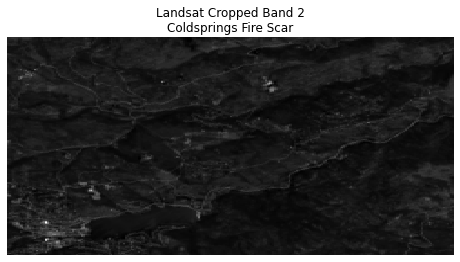

In [19]:
# Open band 4 with rioxarray
landsat_band_4 = rxr.open_rasterio(landsat_post_band_paths[0],
                                   masked=True).squeeze()

# Plot the data
f, ax = plt.subplots(figsize=(8, 4))
landsat_band_4.plot.imshow(cmap="Greys_r",
                           add_colorbar=False)
ax.set(title="Landsat Cropped Band 2\nColdsprings Fire Scar")
ax.set_axis_off()
plt.show()

# Create Raster Stack of All Landsat Bands in Python

Below you use that list of bands to create an xarray object. Notice that 
I wrote a function that combines the files and then outputs an xarray object.

In [20]:
# Generate a path to a new tif file
# landsat_post_fire_dir = os.path.join("cold-springs-fire",
#                                      "outputs")

# # Ensure the directories exist. If it doesn't, create it
# if not os.path.exists(landsat_post_fire_dir):
#     print("Oops - that directory doesn't exist. Creating it now for you.")
#     os.makedirs(landsat_post_fire_dir)
# else:
#     print("Great! The directory exists, moving on.")

In [13]:
def combine_tifs(tif_list):
    """A function that combines a list of tifs in the same CRS
    and of the same extent into an xarray object

    Parameters
    ----------
    tif_list : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An xarray object with all of the tif files in the listmerged into 
    a single object.

    """

    out_xr=[]
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"]=i+1
     
    return xr.concat(out_xr, dim="band") 

In [21]:
landsat_post = combine_tifs(landsat_post_band_paths)


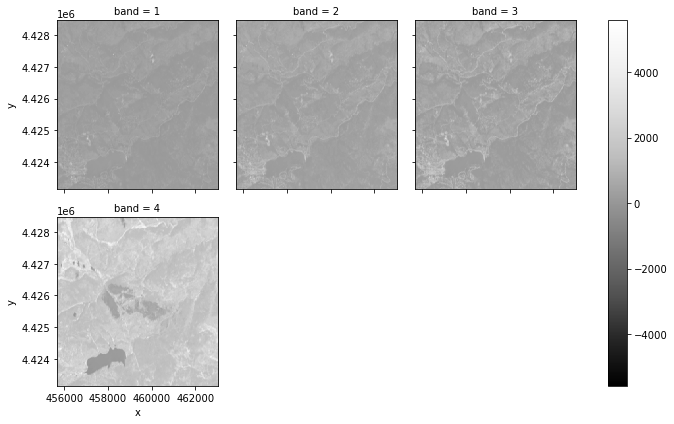

In [22]:
# Plot all of the bands - note that hte plot titles don't represent the actual band numbers.
# they are simply numbered 1-4
landsat_post.plot.imshow(col="band",
                         col_wrap=3,
                         cmap="Greys_r")
plt.show()

## Plot RGB image

Just like you did with NAIP data, you can plot 3 band color composite images with Landsat too. 
Refer to the landsat bands in the table
at the top of this page to figure out the red, green and blue bands. Or read the
<a href="https://blogs.esri.com/esri/arcgis/2013/07/24/band-combinations-for-landsat-8/" target="_blank">ESRI landsat 8 band combinations</a> post.

The major benefit of using earthpy `plot_rgb` is that it has a built in stretch function.
however, it will become more difficult to overlay vector data and create maps using this 
approach as you will need to create a plotting extent to spatially located the data.



The major benefit of using earthpy `plot_rgb` is that it has a built in stretch function.
however, it will become more difficult to overlay vector data and create maps using this 
approach as you will need to create a plotting extent to spatially located the data.

It also will adjust for scaling the data to plot rgb colors. 



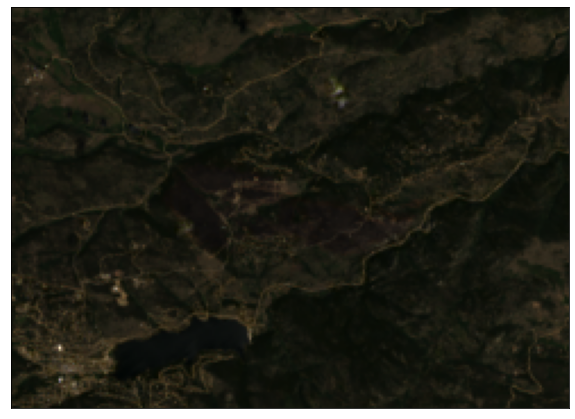

In [25]:
# Create an rgb plot of landsat data. Be sure to select the correct bands!
ep.plot_rgb(landsat_post.values,
            rgb=[2, 1, 0])
plt.show()

Notice that the image above looks dark. You can stretch the image as you did with the NAIP data, too.
Below you use the stretch argument built into the earthpy `plot_rgb()` function. The `str_clip` argument allows you to specify how much of the tails of the data that you want to clip off. The larger the number, the most the data will be stretched or brightened.

<figure>
    <a href="{{ site.url }}/images/courses/earth-analytics/raster-data/raster-image-stretch-dark.jpg">
    <img src="{{ site.url }}/images/courses/earth-analytics/raster-data/raster-image-stretch-dark.jpg" alt="When the range of pixel brightness values is closer to 0, a
    darker image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.">
    </a>
    <figcaption>When the range of pixel brightness values is closer to 0, a
    darker image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.
    </figcaption>
</figure>

<figure>
    <a href="{{ site.url }}/images/courses/earth-analytics/raster-data/raster-image-stretch-light.jpg">
    <img src="{{ site.url }}/images/courses/earth-analytics/raster-data/raster-image-stretch-light.jpg" alt="When the range of pixel brightness values is closer to 255, a
    lighter image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.">
    </a>
    <figcaption>When the range of pixel brightness values is closer to 255, a
    lighter image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.
    </figcaption>
</figure>

In [13]:
# TODO: adjust the plot above and add a stretch to your RGB image of landsat data.

##  If  you Use  Earthpy  to Plot_RGB  - You Will Need  To  Create  a  Plotting  Extent
The benefit of using EarthPy to plot your data will be the ability to stretch 
the data. However if you wish to overlay spatial vector data, you will need to 
create a plotting  extent for this to work. The workflow for this is below.

In [14]:
# Import fire  boundary
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")
fire_boundary = gpd.read_file(fire_boundary_path)

In [15]:
if not fire_boundary.crs == landsat_post.rio.crs:
    print("Your datasets are not in the same crs, I am reprojecting for you")
    fire_boundary_rep = fire_boundary.to_crs(landsat_post.rio.crs)

Your datasets are not in the same crs, I am reprojecting for you


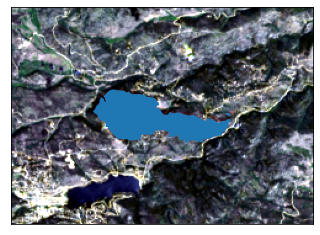

In [16]:
#  Add this import to the TOP in your code - it's here as an example so you know what the import does
from rasterio.plot import plotting_extent

# Create a plotting extent for plotting your data
landsat_extent = plotting_extent(landsat_post[0], 
                                 landsat_post.rio.transform())

f, ax = plt.subplots()
ep.plot_rgb(landsat_post.values,
            rgb=[3, 2, 1],
            stretch=.5, 
            ax=ax,
            extent=landsat_extent)
fire_boundary_rep.plot(ax=ax)
plt.show()

## Raster Pixel Histograms

You can create a histogram to view the distribution of pixel values in the rgb bands plotted above. 

In [17]:
# TODO: Create a plot that has a histogram for each band in your landsat stacked data

Now you've created a red, green blue color composite image. Remember red green and blue are colors that
your eye can see. Create a color infrared image using landsat bands: 4,3,2.


In [18]:
# TODO: Plot a CIR image of Landsat Data